# Compare controls using ML
Compare the distributions of proteomics in the controls

In [1]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Import data

In [2]:
data_file = './data/normalized_proteomics_pivot.csv'
omics = pd.read_csv(data_file, index_col=0)
omics

,MM_1762,PP_0001,PP_0002,PP_0003,PP_0004,PP_0005,PP_0006,PP_0009,PP_0010,PP_0011,...,PP_5416,PP_5417,PP_5418,SPy_1046,YNR043W,aacC1,b4055 JW4015,mvaS,neo,isoprenol
line_name_rep_cycle,,,,,,,,,,,,,,,,,,,,,
Control-R10_c1,0.951793,1.094915,0.970530,1.133319,0.957359,0.787047,0.934429,1.095724,1.152434,0.898198,...,0.792854,0.952586,0.000000,1.275427,0.988950,1.042664,1.075991,0.995796,1.110129,1.024392
Control-R11_c1,1.047312,0.771961,0.854275,1.007493,0.911182,0.794843,1.079606,1.054531,1.054544,1.061720,...,0.872016,1.053211,0.022315,1.095618,1.066124,1.094487,1.224033,1.056521,1.058979,1.120367
Control-R12_c1,1.054954,1.242484,0.500928,1.154855,0.969491,1.662368,0.994657,0.958415,0.958498,1.031600,...,0.890724,0.955814,6.881715,1.179865,1.025106,1.093481,0.905480,1.047002,1.131022,1.178920
Control-R13_c1,0.933705,1.051552,1.586093,0.932927,0.992892,0.994851,1.013185,1.252256,1.137690,1.056214,...,1.008304,1.037332,0.021247,0.819190,1.014700,0.950900,0.904057,0.931308,0.896219,0.720284
Control-R14_c1,0.920443,1.294411,1.084229,1.028170,0.825054,0.875014,1.036462,1.172617,0.838294,1.033187,...,0.991993,0.899485,0.045492,0.901863,1.047413,0.883845,0.997991,0.853035,1.083941,1.030501
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PP_5419-R2_c1,0.831806,1.079450,0.040345,0.591196,0.433515,1.591181,0.635789,0.521773,0.651952,0.840361,...,0.630470,0.871891,0.028549,0.036465,0.972795,0.033226,1.222933,1.042099,1.008801,2.153361
PP_5419-R3_c1,0.854970,1.111790,0.310904,0.663168,0.667366,2.381747,0.622027,0.634366,1.168989,0.809204,...,0.596430,0.767842,0.029056,0.037112,0.938466,0.009552,1.087679,1.080355,1.079077,2.397354
PP_5420-R1_c1,1.004817,1.104894,0.442635,0.748915,0.337878,1.798357,0.237874,0.392700,0.869069,0.328949,...,0.726382,0.892056,0.084788,0.030160,0.705855,0.000445,0.730318,0.143453,1.447907,0.484521


Drop non-controls from data

In [3]:
omics.loc[:,'is_control'] = ['ontrol' in x for x in omics.index.values]
omics = omics.loc[omics['is_control'],:]
omics = omics.drop(columns=['is_control'])

In [4]:
omics.loc[omics['isoprenol'].isna(), 'isoprenol']
omics = omics.dropna(axis = 0, how = 'any', subset=['isoprenol'])
omics

,MM_1762,PP_0001,PP_0002,PP_0003,PP_0004,PP_0005,PP_0006,PP_0009,PP_0010,PP_0011,...,PP_5416,PP_5417,PP_5418,SPy_1046,YNR043W,aacC1,b4055 JW4015,mvaS,neo,isoprenol
line_name_rep_cycle,,,,,,,,,,,,,,,,,,,,,
Control-R10_c1,0.951793,1.094915,0.970530,1.133319,0.957359,0.787047,0.934429,1.095724,1.152434,0.898198,...,0.792854,0.952586,0.000000,1.275427,0.988950,1.042664,1.075991,0.995796,1.110129,1.024392
Control-R11_c1,1.047312,0.771961,0.854275,1.007493,0.911182,0.794843,1.079606,1.054531,1.054544,1.061720,...,0.872016,1.053211,0.022315,1.095618,1.066124,1.094487,1.224033,1.056521,1.058979,1.120367
Control-R12_c1,1.054954,1.242484,0.500928,1.154855,0.969491,1.662368,0.994657,0.958415,0.958498,1.031600,...,0.890724,0.955814,6.881715,1.179865,1.025106,1.093481,0.905480,1.047002,1.131022,1.178920
Control-R13_c1,0.933705,1.051552,1.586093,0.932927,0.992892,0.994851,1.013185,1.252256,1.137690,1.056214,...,1.008304,1.037332,0.021247,0.819190,1.014700,0.950900,0.904057,0.931308,0.896219,0.720284
Control-R14_c1,0.920443,1.294411,1.084229,1.028170,0.825054,0.875014,1.036462,1.172617,0.838294,1.033187,...,0.991993,0.899485,0.045492,0.901863,1.047413,0.883845,0.997991,0.853035,1.083941,1.030501
Control-R15_c1,0.966962,1.087292,0.943327,1.094749,0.979862,0.484415,0.936543,0.878180,1.037401,0.922456,...,0.907364,1.033809,0.002660,1.298308,0.905894,1.007766,1.037094,1.230439,0.791488,0.958758
Control-R16_c1,0.986473,1.228948,1.123717,1.131124,1.006251,0.897349,1.063798,1.115090,0.992411,1.050909,...,0.992256,0.952264,1.158521,1.071945,1.042391,0.921724,1.009343,0.785959,1.110883,0.860978
Control-R17_c1,0.989131,0.761530,1.234522,0.946152,1.046009,1.357295,0.977104,1.019102,1.025302,0.932512,...,1.019920,0.994306,1.705936,0.835350,1.012806,1.051688,0.942973,1.045532,1.065396,1.128591
Control-R18_c1,1.057433,0.922230,0.698434,0.827975,0.967878,1.260941,1.022555,0.987627,0.944886,1.094122,...,1.080460,1.019621,1.132883,0.794397,1.038909,1.018822,1.010590,0.938071,1.032233,1.051673


In [5]:
omics = omics.dropna(axis = 1, how = 'any')
omics

,MM_1762,PP_0001,PP_0002,PP_0003,PP_0004,PP_0005,PP_0006,PP_0009,PP_0010,PP_0011,...,PP_5416,PP_5417,PP_5418,SPy_1046,YNR043W,aacC1,b4055 JW4015,mvaS,neo,isoprenol
line_name_rep_cycle,,,,,,,,,,,,,,,,,,,,,
Control-R10_c1,0.951793,1.094915,0.970530,1.133319,0.957359,0.787047,0.934429,1.095724,1.152434,0.898198,...,0.792854,0.952586,0.000000,1.275427,0.988950,1.042664,1.075991,0.995796,1.110129,1.024392
Control-R11_c1,1.047312,0.771961,0.854275,1.007493,0.911182,0.794843,1.079606,1.054531,1.054544,1.061720,...,0.872016,1.053211,0.022315,1.095618,1.066124,1.094487,1.224033,1.056521,1.058979,1.120367
Control-R12_c1,1.054954,1.242484,0.500928,1.154855,0.969491,1.662368,0.994657,0.958415,0.958498,1.031600,...,0.890724,0.955814,6.881715,1.179865,1.025106,1.093481,0.905480,1.047002,1.131022,1.178920
Control-R13_c1,0.933705,1.051552,1.586093,0.932927,0.992892,0.994851,1.013185,1.252256,1.137690,1.056214,...,1.008304,1.037332,0.021247,0.819190,1.014700,0.950900,0.904057,0.931308,0.896219,0.720284
Control-R14_c1,0.920443,1.294411,1.084229,1.028170,0.825054,0.875014,1.036462,1.172617,0.838294,1.033187,...,0.991993,0.899485,0.045492,0.901863,1.047413,0.883845,0.997991,0.853035,1.083941,1.030501
Control-R15_c1,0.966962,1.087292,0.943327,1.094749,0.979862,0.484415,0.936543,0.878180,1.037401,0.922456,...,0.907364,1.033809,0.002660,1.298308,0.905894,1.007766,1.037094,1.230439,0.791488,0.958758
Control-R16_c1,0.986473,1.228948,1.123717,1.131124,1.006251,0.897349,1.063798,1.115090,0.992411,1.050909,...,0.992256,0.952264,1.158521,1.071945,1.042391,0.921724,1.009343,0.785959,1.110883,0.860978
Control-R17_c1,0.989131,0.761530,1.234522,0.946152,1.046009,1.357295,0.977104,1.019102,1.025302,0.932512,...,1.019920,0.994306,1.705936,0.835350,1.012806,1.051688,0.942973,1.045532,1.065396,1.128591
Control-R18_c1,1.057433,0.922230,0.698434,0.827975,0.967878,1.260941,1.022555,0.987627,0.944886,1.094122,...,1.080460,1.019621,1.132883,0.794397,1.038909,1.018822,1.010590,0.938071,1.032233,1.051673


In [6]:
protein_measurements = omics.columns[:-1]
protein_measurements


Index(['MM_1762', 'PP_0001', 'PP_0002', 'PP_0003', 'PP_0004', 'PP_0005',
       'PP_0006', 'PP_0009', 'PP_0010', 'PP_0011',
       ...
       'PP_5415', 'PP_5416', 'PP_5417', 'PP_5418', 'SPy_1046', 'YNR043W',
       'aacC1', 'b4055 JW4015', 'mvaS', 'neo'],
      dtype='object', length=1898)

In [7]:
X = omics[protein_measurements]
y = omics['isoprenol']
X

,MM_1762,PP_0001,PP_0002,PP_0003,PP_0004,PP_0005,PP_0006,PP_0009,PP_0010,PP_0011,...,PP_5415,PP_5416,PP_5417,PP_5418,SPy_1046,YNR043W,aacC1,b4055 JW4015,mvaS,neo
line_name_rep_cycle,,,,,,,,,,,,,,,,,,,,,
Control-R10_c1,0.951793,1.094915,0.970530,1.133319,0.957359,0.787047,0.934429,1.095724,1.152434,0.898198,...,0.951346,0.792854,0.952586,0.000000,1.275427,0.988950,1.042664,1.075991,0.995796,1.110129
Control-R11_c1,1.047312,0.771961,0.854275,1.007493,0.911182,0.794843,1.079606,1.054531,1.054544,1.061720,...,0.988927,0.872016,1.053211,0.022315,1.095618,1.066124,1.094487,1.224033,1.056521,1.058979
Control-R12_c1,1.054954,1.242484,0.500928,1.154855,0.969491,1.662368,0.994657,0.958415,0.958498,1.031600,...,1.031219,0.890724,0.955814,6.881715,1.179865,1.025106,1.093481,0.905480,1.047002,1.131022
Control-R13_c1,0.933705,1.051552,1.586093,0.932927,0.992892,0.994851,1.013185,1.252256,1.137690,1.056214,...,1.072695,1.008304,1.037332,0.021247,0.819190,1.014700,0.950900,0.904057,0.931308,0.896219
Control-R14_c1,0.920443,1.294411,1.084229,1.028170,0.825054,0.875014,1.036462,1.172617,0.838294,1.033187,...,0.991063,0.991993,0.899485,0.045492,0.901863,1.047413,0.883845,0.997991,0.853035,1.083941
Control-R15_c1,0.966962,1.087292,0.943327,1.094749,0.979862,0.484415,0.936543,0.878180,1.037401,0.922456,...,0.911511,0.907364,1.033809,0.002660,1.298308,0.905894,1.007766,1.037094,1.230439,0.791488
Control-R16_c1,0.986473,1.228948,1.123717,1.131124,1.006251,0.897349,1.063798,1.115090,0.992411,1.050909,...,0.984902,0.992256,0.952264,1.158521,1.071945,1.042391,0.921724,1.009343,0.785959,1.110883
Control-R17_c1,0.989131,0.761530,1.234522,0.946152,1.046009,1.357295,0.977104,1.019102,1.025302,0.932512,...,1.048391,1.019920,0.994306,1.705936,0.835350,1.012806,1.051688,0.942973,1.045532,1.065396
Control-R18_c1,1.057433,0.922230,0.698434,0.827975,0.967878,1.260941,1.022555,0.987627,0.944886,1.094122,...,1.055196,1.080460,1.019621,1.132883,0.794397,1.038909,1.018822,1.010590,0.938071,1.032233


In [8]:
y

line_name_rep_cycle
Control-R10_c1      1.024392
Control-R11_c1      1.120367
Control-R12_c1      1.178920
Control-R13_c1      0.720284
Control-R14_c1      1.030501
Control-R15_c1      0.958758
Control-R16_c1      0.860978
Control-R17_c1      1.128591
Control-R18_c1      1.051673
Control-R1_c1       1.078340
Control-R2_c1       1.105987
Control-R3_c1       1.030112
Control-R4_c1       0.983110
Control-R5_c1       0.829594
Control-R6_c1       0.987016
Control-R7_c1       0.985841
Control-R8_c1       0.962688
Control-R9_c1       0.962849
Control_P1-R1_c2    1.038139
Control_P1-R1_c3    1.100058
Control_P1-R1_c4    0.974428
Control_P1-R2_c2    1.002743
Control_P1-R2_c3    1.074988
Control_P1-R2_c4    0.973433
Control_P1-R3_c2    1.064302
Control_P1-R3_c3    0.812997
Control_P1-R3_c4    1.078658
Control_P2-R1_c2    0.939284
Control_P2-R1_c3    0.928316
Control_P2-R1_c4    0.985401
Control_P2-R2_c2    0.948469
Control_P2-R2_c3    0.914068
Control_P2-R2_c4    1.026816
Control_P2-R3_c2    0.9

In [9]:
omics_index = omics.index.values
cycle_label = [int(x[-1]) for x in omics_index]
num_grna = [x.count('PP') for x in omics_index]
is_control = [1 if 'ontrol' in x else 0 for x in omics_index]

### Scale data for ML

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_norm = scaler.fit_transform(X)
X_norm
X_norm_df = X.copy()
X_norm_df.iloc[:,:] = X_norm
X_norm_df

,MM_1762,PP_0001,PP_0002,PP_0003,PP_0004,PP_0005,PP_0006,PP_0009,PP_0010,PP_0011,...,PP_5415,PP_5416,PP_5417,PP_5418,SPy_1046,YNR043W,aacC1,b4055 JW4015,mvaS,neo
line_name_rep_cycle,,,,,,,,,,,,,,,,,,,,,
Control-R10_c1,-0.424623,0.299661,-0.071376,0.394243,-0.149426,-0.485112,-0.510949,0.452656,0.523302,-0.694013,...,-0.775482,-1.099099,-0.709858,-0.975589,0.968591,-0.124957,0.449778,0.404588,-0.028437,0.787603
Control-R11_c1,0.416742,-0.719957,-0.352938,0.022159,-0.311242,-0.467352,0.620319,0.257866,0.187248,0.420764,...,-0.176495,-0.679074,0.796650,-0.953819,0.336258,0.747736,0.996110,1.192789,0.382355,0.421793
Control-R12_c1,0.484057,0.765562,-1.208726,0.457928,-0.106910,1.508893,-0.041638,-0.196646,-0.142476,0.215427,...,0.497599,-0.579809,-0.661535,5.738138,0.632531,0.283897,0.985505,-0.503243,0.317959,0.937024
Control-R13_c1,-0.583955,0.162758,1.419485,-0.198345,-0.024907,-0.011729,0.102743,1.192861,0.472686,0.383230,...,1.158673,0.044063,0.558922,-0.954861,-0.635852,0.166225,-0.517628,-0.510816,-0.464690,-0.742200
Control-R14_c1,-0.700772,0.929505,0.203999,0.083304,-0.613058,-0.284722,0.284122,0.816266,-0.555134,0.226242,...,-0.142451,-0.042482,-1.504864,-0.931207,-0.345118,0.536155,-1.224543,-0.010696,-0.994191,0.600315
Control-R15_c1,-0.291007,0.275595,-0.137258,0.280186,-0.070569,-1.174517,-0.494482,-0.576058,0.128396,-0.528636,...,-1.410402,-0.491520,0.506166,-0.972994,1.049059,-1.064162,0.081868,0.197496,1.558876,-1.491198
Control-R16_c1,-0.119148,0.722828,0.299637,0.387752,0.021905,-0.233842,0.497134,0.544235,-0.026051,0.347059,...,-0.240646,-0.041090,-0.714680,0.154651,0.253008,0.479360,-0.825215,0.049742,-1.447951,0.792994
Control-R17_c1,-0.095736,-0.752889,0.567999,-0.159236,0.161229,0.813927,-0.178410,0.090330,0.086860,-0.460082,...,0.771290,0.105694,-0.085245,0.688703,-0.579023,0.144811,0.544916,-0.303620,0.308015,0.467687
Control-R18_c1,0.505891,-0.245533,-0.730378,-0.508703,-0.112564,0.594432,0.175758,-0.058508,-0.189205,0.641659,...,0.879757,0.426915,0.293759,0.129639,-0.723044,0.439991,0.198431,0.056382,-0.418940,0.230517


### PCA
See whether PCA distinguishes between cycles

In [11]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 10)
X_pca = pca.fit_transform(X_norm)

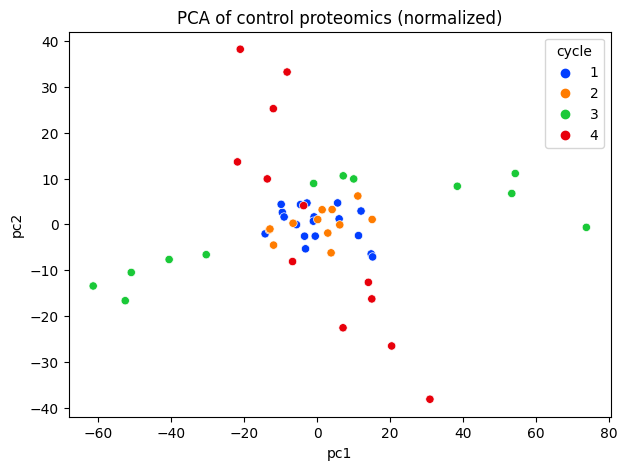

In [21]:
fig, ax = plt.subplots(figsize = (7,5))
df_pca = pd.DataFrame(dict(pc1 = X_pca[:,0], pc2 = X_pca[:,1], cycle = cycle_label))
sns.scatterplot(data = df_pca, x = 'pc1', y = 'pc2', hue = 'cycle', palette='bright', ax = ax)
ax.set_title('PCA of control proteomics (normalized)')
fig.savefig('./figures/controls_PCA_colored_by_titer.png')

## Volcano plot for proteomics distribution

In [13]:
from scipy.stats import ttest_ind

In [14]:
omics.loc[:, 'cycle'] = [int(x[-1]) for x in omics.index]

In [15]:
omics

,MM_1762,PP_0001,PP_0002,PP_0003,PP_0004,PP_0005,PP_0006,PP_0009,PP_0010,PP_0011,...,PP_5417,PP_5418,SPy_1046,YNR043W,aacC1,b4055 JW4015,mvaS,neo,isoprenol,cycle
line_name_rep_cycle,,,,,,,,,,,,,,,,,,,,,
Control-R10_c1,0.951793,1.094915,0.970530,1.133319,0.957359,0.787047,0.934429,1.095724,1.152434,0.898198,...,0.952586,0.000000,1.275427,0.988950,1.042664,1.075991,0.995796,1.110129,1.024392,1
Control-R11_c1,1.047312,0.771961,0.854275,1.007493,0.911182,0.794843,1.079606,1.054531,1.054544,1.061720,...,1.053211,0.022315,1.095618,1.066124,1.094487,1.224033,1.056521,1.058979,1.120367,1
Control-R12_c1,1.054954,1.242484,0.500928,1.154855,0.969491,1.662368,0.994657,0.958415,0.958498,1.031600,...,0.955814,6.881715,1.179865,1.025106,1.093481,0.905480,1.047002,1.131022,1.178920,1
Control-R13_c1,0.933705,1.051552,1.586093,0.932927,0.992892,0.994851,1.013185,1.252256,1.137690,1.056214,...,1.037332,0.021247,0.819190,1.014700,0.950900,0.904057,0.931308,0.896219,0.720284,1
Control-R14_c1,0.920443,1.294411,1.084229,1.028170,0.825054,0.875014,1.036462,1.172617,0.838294,1.033187,...,0.899485,0.045492,0.901863,1.047413,0.883845,0.997991,0.853035,1.083941,1.030501,1
Control-R15_c1,0.966962,1.087292,0.943327,1.094749,0.979862,0.484415,0.936543,0.878180,1.037401,0.922456,...,1.033809,0.002660,1.298308,0.905894,1.007766,1.037094,1.230439,0.791488,0.958758,1
Control-R16_c1,0.986473,1.228948,1.123717,1.131124,1.006251,0.897349,1.063798,1.115090,0.992411,1.050909,...,0.952264,1.158521,1.071945,1.042391,0.921724,1.009343,0.785959,1.110883,0.860978,1
Control-R17_c1,0.989131,0.761530,1.234522,0.946152,1.046009,1.357295,0.977104,1.019102,1.025302,0.932512,...,0.994306,1.705936,0.835350,1.012806,1.051688,0.942973,1.045532,1.065396,1.128591,1
Control-R18_c1,1.057433,0.922230,0.698434,0.827975,0.967878,1.260941,1.022555,0.987627,0.944886,1.094122,...,1.019621,1.132883,0.794397,1.038909,1.018822,1.010590,0.938071,1.032233,1.051673,1


In [16]:
volcano_df = pd.DataFrame(index = protein_measurements, columns = ['neg_log10pval', 'log2fc'])
volcano_df

,neg_log10pval,log2fc
MM_1762,NaN,NaN
PP_0001,NaN,NaN
PP_0002,NaN,NaN
PP_0003,NaN,NaN
PP_0004,NaN,NaN
...,...,...
YNR043W,NaN,NaN
aacC1,NaN,NaN
b4055 JW4015,NaN,NaN
mvaS,NaN,NaN


In [17]:
for idx, row in volcano_df.iterrows():
    stat, pv = ttest_ind(
        omics.loc[omics['cycle']==1, idx],
        omics.loc[omics['cycle']==2, idx])
    mean_fc = omics.loc[omics['cycle']==1, idx].mean()/omics.loc[omics['cycle']==2, idx].mean()
    volcano_df.loc[idx, 'neg_log10pval'] = -np.log10(pv)
    volcano_df.loc[idx, 'log2fc'] = np.log2(mean_fc)
    
    

In [18]:
volcano_df.loc['MM_1762',:]

neg_log10pval    0.0
log2fc          -0.0
Name: MM_1762, dtype: object

In [19]:
mean_fc

0.9999999999999998

Text(0, 0.5, 'log2(fold change) - cycle 1/cycle 2')

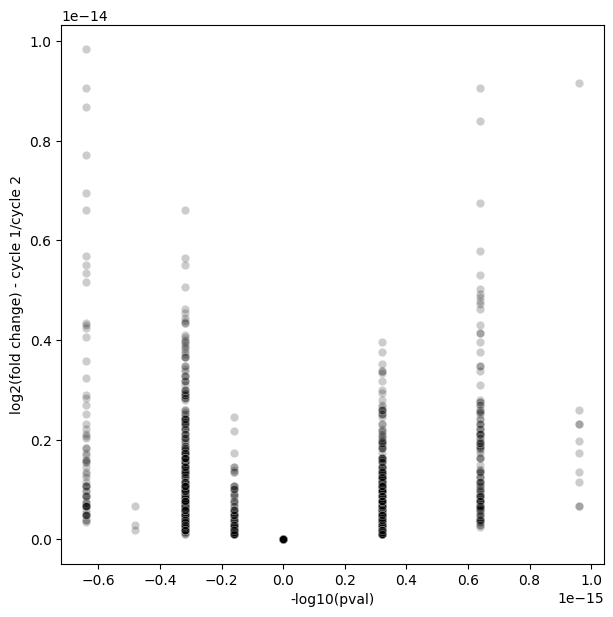

In [20]:
fig, ax = plt.subplots(figsize = (7,7))
sns.scatterplot(volcano_df, x = 'log2fc', y = 'neg_log10pval', color = 'k', alpha = 0.2)
ax.set_xlabel('-log10(pval)')
ax.set_ylabel('log2(fold change) - cycle 1/cycle 2')